In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_mlp = pd.read_csv("df_cbc_lsa.csv")

In [3]:
df_mlp

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CBC
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.175439
1,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.175439
2,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.175439
3,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.175439
4,4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.175439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.614035
74996,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.614035
74997,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.614035
74998,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.614035


In [4]:
df_mlp.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

In [5]:
X = df_mlp.drop(['index', 'X..CBC'], axis = 1)
y = df_mlp[['X..CBC']]

<AxesSubplot:ylabel='Count'>

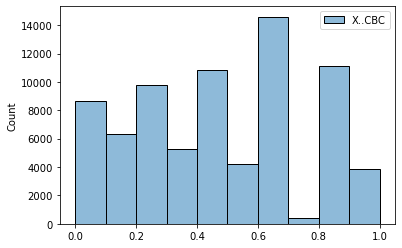

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
mean_absolute_error(y_val, y_pred_mlp)

0.14724670674753046

In [11]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.5886825314485602

In [12]:
#val
r2_score(y_val, y_pred_mlp)

0.4665821154764974

Residual plots for each target variable

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([1.12234529e-01, 1.09464919e-01, 1.12456571e-01, 1.19202903e-01,
       1.11761612e-01, 1.99489548e-02, 3.45261356e-03, 2.89547794e-02,
       7.12259235e-05, 2.37857057e-03, 5.87742739e-03, 1.16744515e-04,
       8.43398290e-03, 8.01832919e-05, 4.32222935e-03, 6.06042831e-03,
       8.30670445e-03, 9.36614377e-03, 1.08582052e-04, 9.60939444e-03,
       1.32897546e-04, 1.00133350e-04, 8.18358899e-03, 6.99515179e-03,
       1.02158448e-02, 2.41525501e-03, 8.80455196e-03, 7.72610496e-05,
       1.02439568e-04, 3.39752820e-03, 1.26187687e-02, 1.99390309e-04,
       7.85746695e-03, 0.00000000e+00, 3.28396743e-07, 7.30680688e-03,
       6.30523084e-03, 9.42220205e-03, 1.04915712e-03, 3.36217930e-04,
       2.01087217e-04, 9.85392202e-03, 2.51665496e-04, 1.30348981e-02,
       4.09679312e-03, 7.68013028e-03, 1.49834615e-03, 7.88400887e-04,
       5.38529543e-03, 9.42356354e-04, 4.62337109e-02, 1.01733500e-02,
       4.75565092e-03, 1.32466205e-03, 7.55283407e-03, 8.09144357e-03,
      

In [16]:
selector.threshold_

0.011627906976744186

In [17]:
mask = selector.get_support()

In [18]:
mask

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False])

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_mlp[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,sativa,relaxed,blueberry,diesel,lemon,orange,vanilla
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,1,0,0,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,1,0,0,0,0,1
2,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,1,0,0,0,0,0
3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,1,0,0,0,0,0
4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.324915,0.131823,-0.099424,0.065491,0.038437,0,0,1,0,0,0,0,0
74996,0.324915,0.131823,-0.099424,0.065491,0.038437,0,0,1,0,0,0,0,0
74997,0.324915,0.131823,-0.099424,0.065491,0.038437,0,0,1,0,0,0,0,0
74998,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,0,1,1,1,1,1,1


In [21]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'sativa',
 'relaxed',
 'blueberry',
 'diesel',
 'lemon',
 'orange',
 'vanilla']

In [22]:
import joblib

joblib.dump(selector, "selector_mlp_lsa_elbow_cbc.pkl")
joblib.dump(selected_X, "selected_X_mlp_lsa_elbow_cbc.pkl")

['selected_X_mlp_lsa_elbow_cbc.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.19674406268072722

In [27]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.24334433647679654

In [28]:
#val
r2_score(y_val, y_pred_mlpreg)

0.2290019319776775

Hyperparameter Tuning

In [29]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [30]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [31]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [32]:
rscv.best_params_

{'max_iter': 1000, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'tanh'}

In [33]:
joblib.dump(rscv, "rscv_mlp_lsa_elbow_cbc.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_lsa_elbow_best_params_cbc.pkl")

['rscv_mlp_lsa_elbow_best_params_cbc.pkl']

MLP fit (after hyperparameter tuning)

In [34]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=1000, activation = 'tanh', hidden_layer_sizes= (50,100,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.20105545030599917

In [36]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.20570052585728593

In [37]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.19887018137530255

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [38]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [39]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_lsa_elbow_cbc.pkl")
joblib.dump(y_test, "y_test_mlpreg_lsa_elbow_cbc.pkl")

['y_test_mlpreg_lsa_elbow_cbc.pkl']

In [40]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.20229085909806307

In [41]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.06149170448191905

In [42]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.24797520940997117

In [43]:
r2_score(y_test, y_pred_mlpreg_test)

0.191981228906127

Error analysis

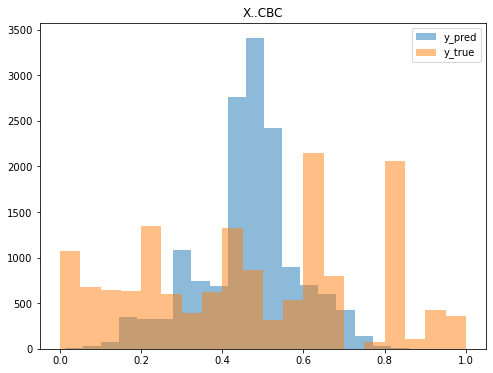

<Figure size 432x288 with 0 Axes>

In [44]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBC"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_lsa_elbow_cbc.png')

Pearson R

In [45]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.438
P-value: 0.000


<AxesSubplot:>

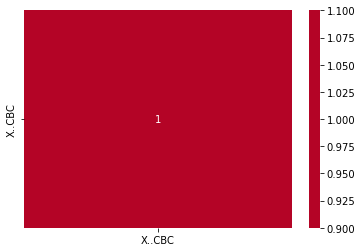

In [46]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)